<xarray.DataArray 'sst' (time: 225, lat: 161)>
array([[22.43814 , 22.544873, 22.659369, ..., 27.092993, 27.043184, 27.025719],
       [22.423909, 22.527408, 22.639963, ..., 26.974616, 26.921573, 26.904755],
       [22.410972, 22.524821, 22.636082, ..., 27.053534, 27.005019, 26.97591 ],
       ...,
       [25.735867, 25.968739, 26.136277, ..., 24.218317, 24.147162, 24.062423],
       [25.727457, 25.961623, 26.129162, ..., 24.25907 , 24.190502, 24.109644],
       [25.598731, 25.870415, 26.06965 , ..., 24.32311 , 24.261658, 24.187268]])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T09:00:00 ... 2020-08-31T09:00:00
  * lat      (lat) float64 20.0 19.75 19.5 19.25 ... -19.25 -19.5 -19.75 -20.0
    expver   float64 ...
    lon      float64 ...
Attributes:
    long_name:    Sea surface temperature
    units:        K
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Jan 27 13:12:52 2022: cdo zonmean -se

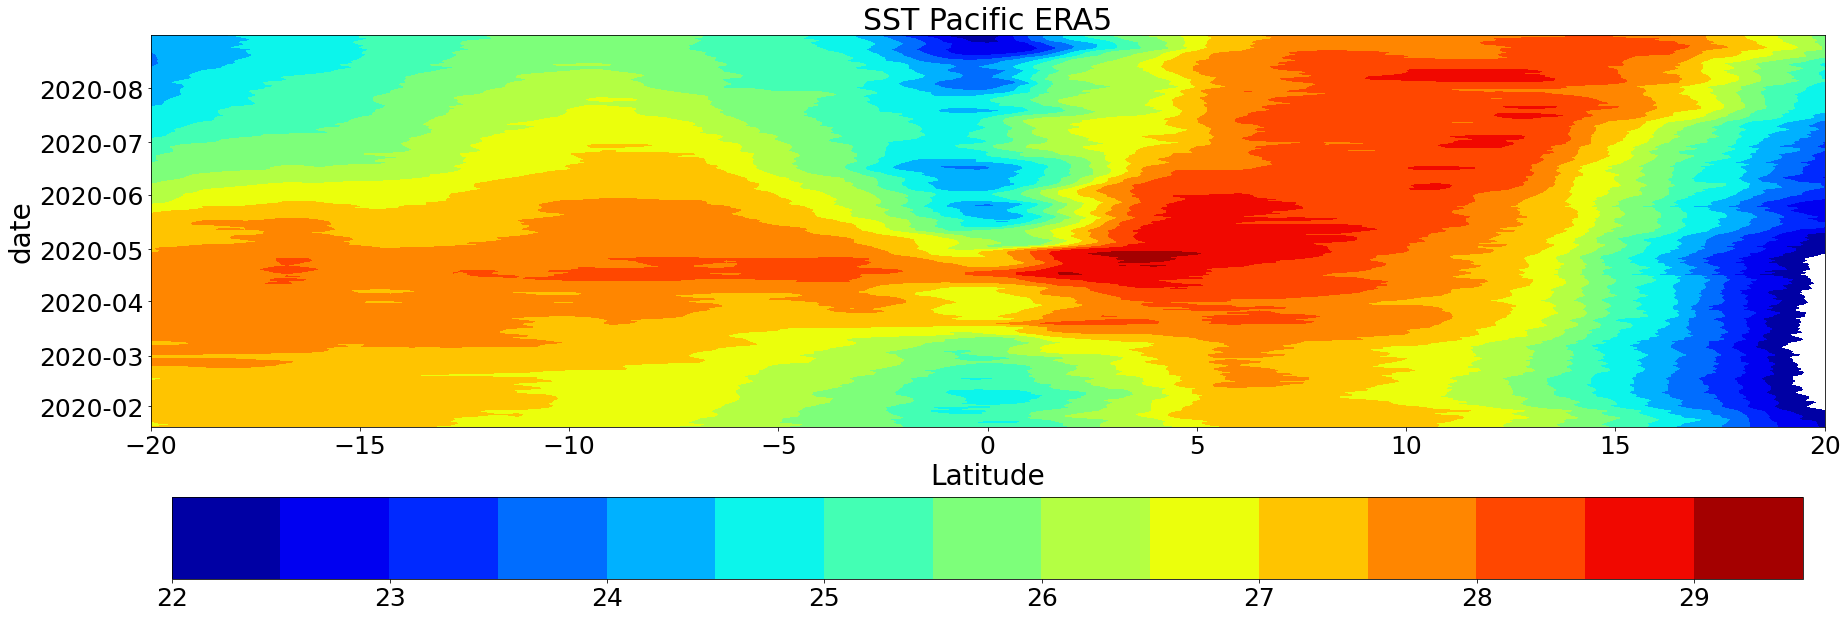

In [15]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot ERA5
###############
datain = iris.load_cube('/work/bb1153/b381639/ERA5/sst_2020_tropical_ocean_paclat.nc')

datain.data=datain.data-273.15

#datain.data=datain.data*-1
regyonx=datain[:,0,:,0]

ERA5=regyonx

#print(ERA5)



######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
print(arr)
arr_era=arr
latm=arr.lat.data              # latm is x-axis




time=arr.time.data 
#np.arange(0,225,1)
##################
#(2)set color bar and prepare fig size
#levels1=np.arange(0,130,5) # min and max of the field; dont use it if not sure
levels1=np.arange(22,30,0.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean_r'
#cbar='seismic'
cbar='jet'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(latm,time,arr[:,:],levels=levels1,cmap = cbar)
#plt.contourf(latm,time,arr,cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('SST Pacific ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('Latitude'), fontsize=28)
plt.ylabel(('date'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('SST_pac_ERA5.eps',format='eps',dpi=1000)

/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)


<xarray.DataArray 'ts' (time: 225, lat: 161)>
array([[21.820679, 22.057343, 22.205994, ..., 27.246552, 27.249695, 27.26706 ],
       [21.957916, 22.183136, 22.352814, ..., 27.40039 , 27.420135, 27.44284 ],
       [21.831116, 22.049347, 22.238556, ..., 27.29422 , 27.359436, 27.328156],
       ...,
       [27.220825, 27.287018, 27.334442, ..., 20.84024 , 20.793884, 20.768616],
       [27.00647 , 27.120941, 27.212372, ..., 20.851135, 20.785797, 20.750763],
       [26.85614 , 26.948334, 26.98648 , ..., 20.779083, 20.721008, 20.684937]],
      dtype=float32)
Coordinates:
  * time     (time) float64 2.02e+07 2.02e+07 2.02e+07 ... 2.02e+07 2.02e+07
  * lat      (lat) float64 20.0 19.75 19.5 19.25 ... -19.25 -19.5 -19.75 -20.0
    lon      float64 ...
Attributes:
    standard_name:             surface_temperature
    long_name:                 surface temperature
    units:                     K
    CDI:                       Climate Data Interface version 1.9.6 (http://m...
    history:      

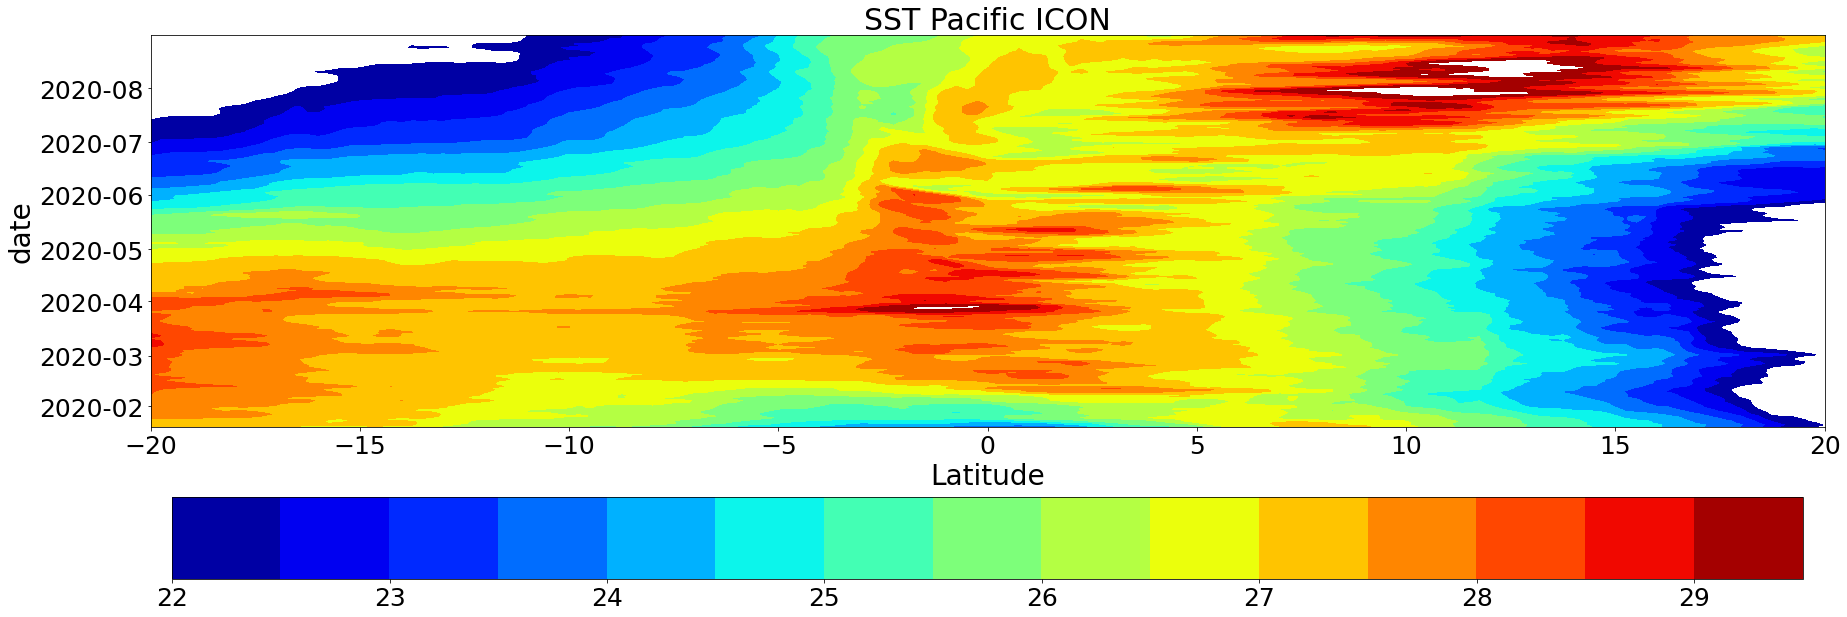

In [16]:
###############
# plot ICON
###############
datain = iris.load_cube('/work/bb1153/b381639/model/data_icon/sst_2020_tropical_ocean_paclat.nc')

datain.data=datain.data-273.15

#datain.data=datain.data*-1
regyonx=datain[:,:,0]

ICON=regyonx

######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ICON) # iris cube to xarray
arr_icon=arr
print(arr)
#latm=arr.latitude.data              # latm is x-axis
lonm=arr.lat.data             # lonm is y-axis  
#time=np.arange(0,225,1)
##################
#(2)set color bar and prepare fig size
#levels1=np.arange(0,130,5) # min and max of the field; dont use it if not sure
levels1=np.arange(22,30,.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean_r'
#cbar='seismic'
cbar='jet'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,time,arr[:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('SST Pacific ICON',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('Latitude'), fontsize=28)
plt.ylabel(('date'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('SST_pac_ICON.eps',format='eps',dpi=1000)

In [17]:
SSTdiff=ICON.data-ERA5.data

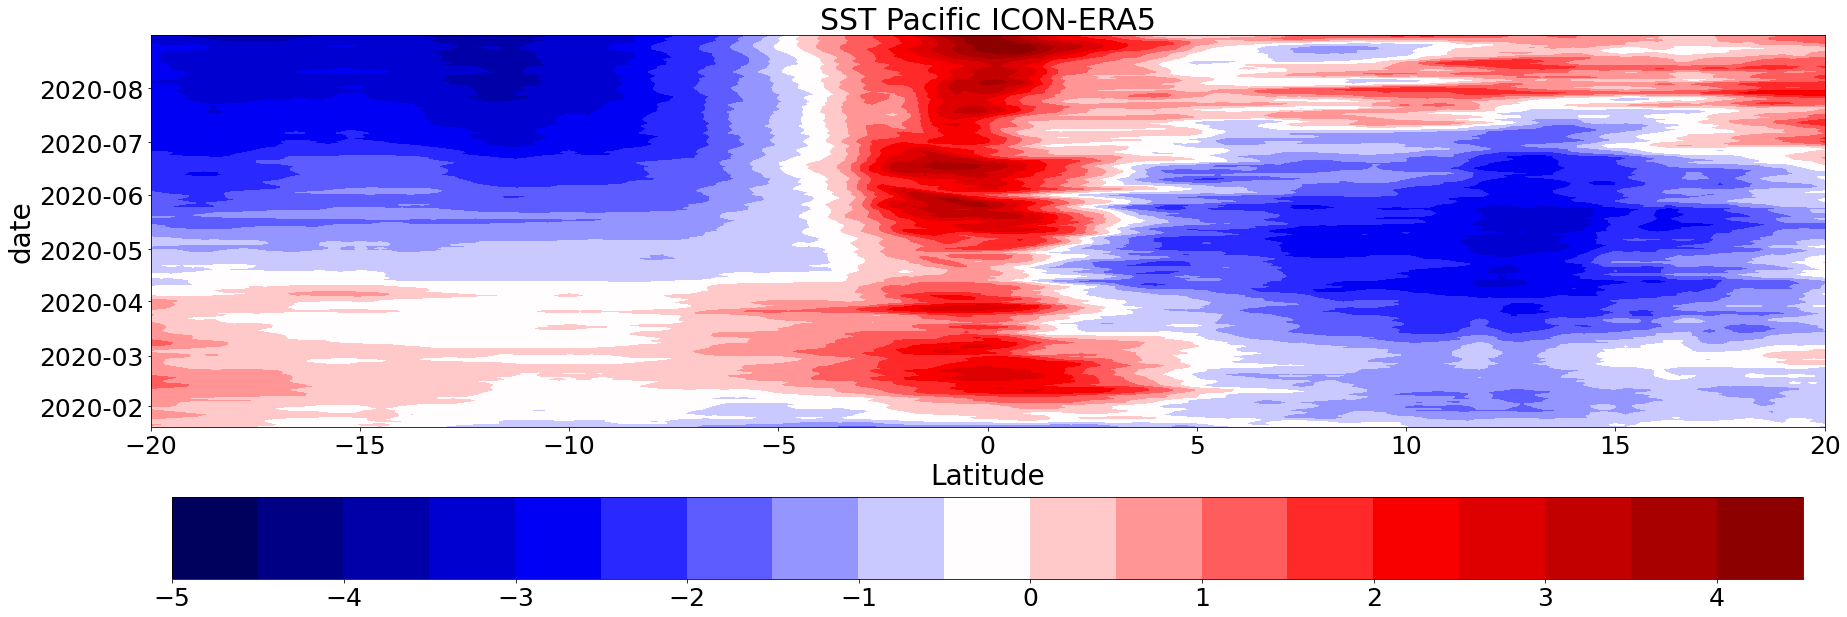

In [18]:
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=SSTdiff #ar.DataArray.from_iris(SSTdiff) # iris cube to xarray
#latm=arr.latitude.data              # latm is x-axis
#lonm=arr.longitude.data             # lonm is y-axis  

##################
#(2)set color bar and prepare fig size
levels1=np.arange(-5,5,.5) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='jet'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,time,arr[:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('SST Pacific ICON-ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('Latitude'), fontsize=28)
plt.ylabel(('date'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('SST_pac_ICON-ERA5.eps',format='eps',dpi=1000)